In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

In [2]:
market = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
market.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 删除原始数据左右空格
for i in market.columns:
    market[i] = market[i].str.strip()

In [4]:
items=[]
for i in market.index:
    items.extend(market.loc[i].unique())
# 删除nan
items=[str(i) for i in items if str(i)!="nan"]

#### 可视化top10

In [5]:
# 计数 item-count
item_count={}
for i in set(items):
    item_count.update({i:items.count(i)})

In [6]:
top_10=sorted(item_count.items(),key=lambda x:x[1],reverse=True)[:10]

In [7]:
top_10

[('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1229),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713)]

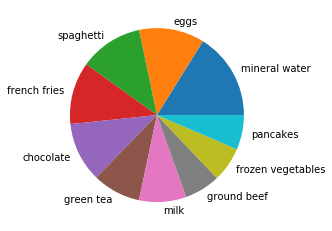

In [8]:
# top10 饼图
count = [i[1] for i in top_10]
labels = [i[0] for i in top_10]
plt.pie(count,labels=labels)
plt.show()

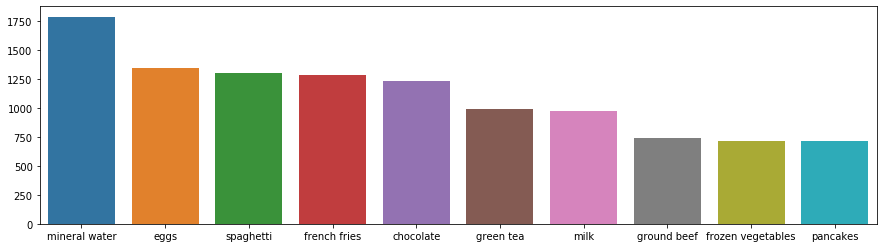

In [9]:
# top10(条形图)
plt.figure(figsize=(15, 4))
sns.barplot(x = labels, y = count);
plt.show()

#### 词云

In [10]:
# 空格分隔符
words='-'.join(items)

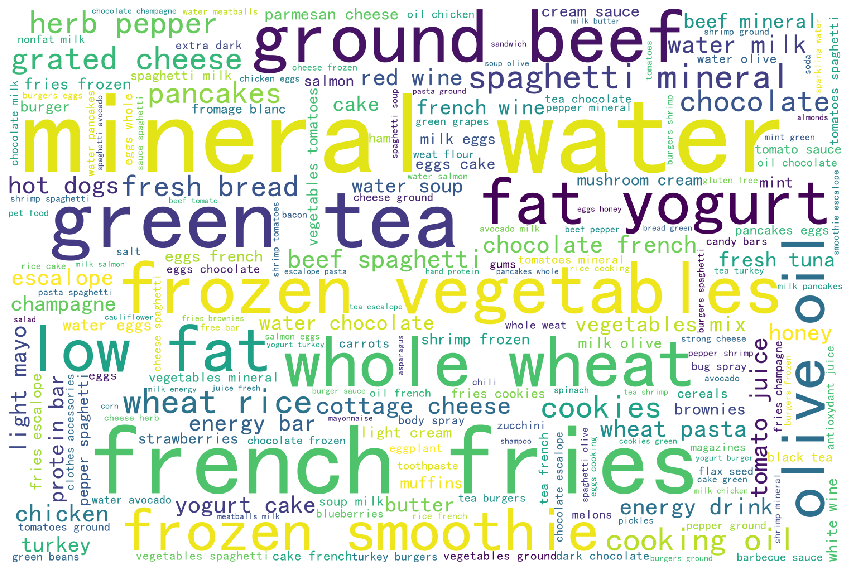

In [11]:
word=WordCloud(background_color="white",width=1500,height=1000,font_path='simhei.ttf',).generate(words)
word.to_file('Market_Basket.png')
img = Image.open("Market_Basket.png")
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(img)